## Final Model Evaluation

This notebook evaluates the performance of the final LightGBM model using the test set. We'll assess its classification metrics, visualize the ROC curve, and summarize its results


In [1]:
# Import Libraries
import pandas as pd
import joblib
from src.utils import evaluate_model, save_evaluation_summary
from sklearn.model_selection import train_test_split

## Load Data and LightGBM Model
We load the test set and the best LightGBM model saved after hyperparameter tuning.


In [ ]:
# Load Data
df = pd.read_csv("data/train_preprocessed.csv")
X = df.drop(columns=["loan_status", "id"], errors="ignore")
y = df["loan_status"]

_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model_lgb = joblib.load("models/best_lightgbm_model.pkl")
input_cols = joblib.load("models/input_columns.pkl")

X_test_aligned = X_test[input_cols]

## Evaluate LightGBM On Test Set
Let’s evaluate the final model using various metrics.


=== LightGBM Evaluation ===
ROC AUC: 0.9603392082521507
Accuracy: 0.9523403529712678
Precision: 0.9217919514047077
Recall: 0.7269461077844311
F1 Score: 0.812855708068296

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.92      0.73      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



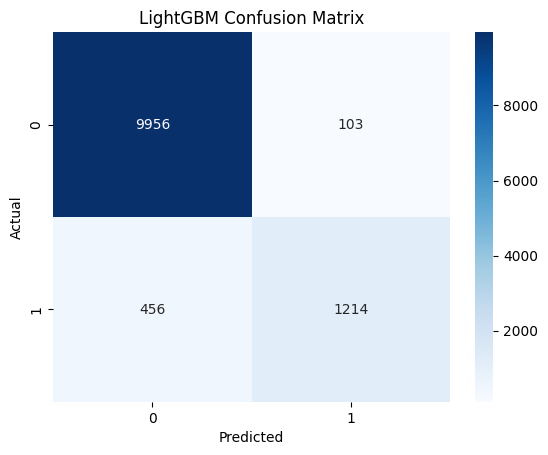

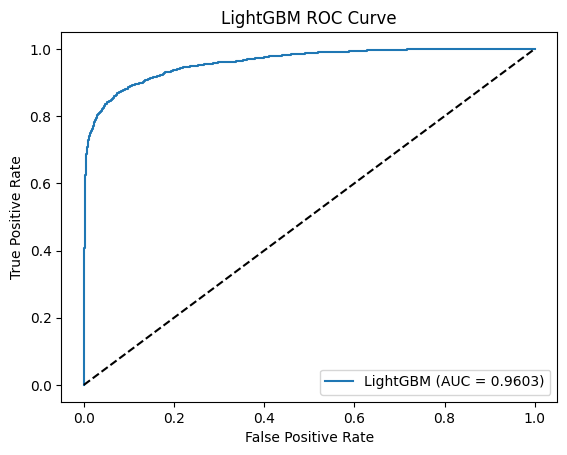

In [3]:
evaluate_model(model_lgb, X_test, y_test, model_name="LightGBM")

In [5]:
# Save Evaluation Summary
summary_df = save_evaluation_summary(model_lgb, X_test, y_test)

## Final Model Summary

The best-performing model was LightGBM after Optuna tuning.

- **ROC AUC:** 0.9603
- **Accuracy:** 95.2%
- **Precision (approval class - 0):** 96.1%
- **Recall (approval class - 0):** 99.1%
- **F1 Score (approval class - 0):** 97.6%

This indicates that the model is highly effective at approving the right applicants, with a very low false positive rate (i.e., rarely approves someone who should be denied).